In [3]:
## produce data from graph
filename = "cat"

min:  48
max:  123
avg:  75.63157894736842


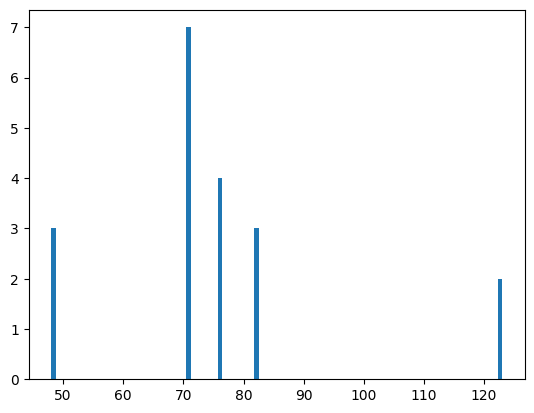

In [4]:
import glob
import matplotlib.pyplot as plt

## check the distribution of the traces
lens = []

# read the *.ftr in the folders under the path ../../Traces/traces
for file in glob.glob(f"../../Traces/traces/{filename}"):
    for ftr in glob.glob(file + "/*.ftr"):
        # read ftr
        with open(ftr, "r") as f:
            lineLen = len(f.readlines())
            lens.append(lineLen)

# show the distribution
print("min: ", min(lens))
print("max: ", max(lens))
print("avg: ", sum(lens) / len(lens))

plt.hist(lens, bins=100)
plt.show()

# make the min and max length of the traces
minLen = min(lens)
maxLen = 80

In [5]:
import networkx as nx
import json
import pickle

# read the graph with pickle
with open(f"../../Dominators/graphs/{filename}_combined_graph.pkl", "rb") as f:
    graph = pickle.load(f)

# get the id of start and the end node
with open(f"../../Traces/progSpec/{filename}.json", "r") as f:
    funcs = json.load(f)
    for func in funcs:
        if func["function name"] == "main":
            for node in func["nodes"]:
                if node["type"] == "ePoint":
                    startId = node["id"]
                if node["type"] == "retCall":
                    endId = node["id"]

In [6]:
# increase the recursion limit
import sys
sys.setrecursionlimit(10000000)

In [ ]:
import glob
import matplotlib.pyplot as plt
import json

## check the distribution of the traces
traces = []

# read the *.ftr in the folders under the path ../../Traces/traces
for file in glob.glob(f"../../Traces/traces/{filename}"):
    for ftr in glob.glob(file + "/*.ftr"):
        # read ftr
        with open(ftr, "r") as f:
            traces.append(list(map(lambda x : x.strip('\n'), f.readlines())))

# get the labels of the ground traces
freq = {}
for trace in traces:
    for label in trace:
        label = label.strip("/")
        if label in freq:
            freq[label] += 1
        else:
            freq[label] = 1

In [10]:
# retrieving all journies require more than 3.5GB memory and 70 mins. Not feasible. 

# do a dfs
journeys_dfs = []

stack = [startId]

def dfs(stack, journey):
    global graph

    node = stack.pop()

    if len(journey) > maxLen or len(journeys_dfs) >= 10e5:
        return
    elif node == endId:
        journeys_dfs.append(journey.copy())
        return
    
    for neighbor in graph.neighbors(node):
        stack.append(neighbor)
        journey.append(neighbor)
        dfs(stack, journey)
        journey.pop()

dfs(stack, [startId])

In [8]:
# do a bfs
from collections import deque

journeys_bfs = []

dq = deque([startId])

def bfs(dq, journey):
    global graph

    node = dq.popleft()

    if len(journey) > maxLen or len(journeys_bfs) >= 10e5:
        return
    elif node == endId:
        journeys_bfs.append(journey.copy())
        return
    
    for neighbor in graph.neighbors(node):
        dq.append(neighbor)
        journey.append(neighbor)
        bfs(dq, journey)
        journey.pop()

bfs(dq, [startId])

min:  35
max:  80
avg:  78.500004


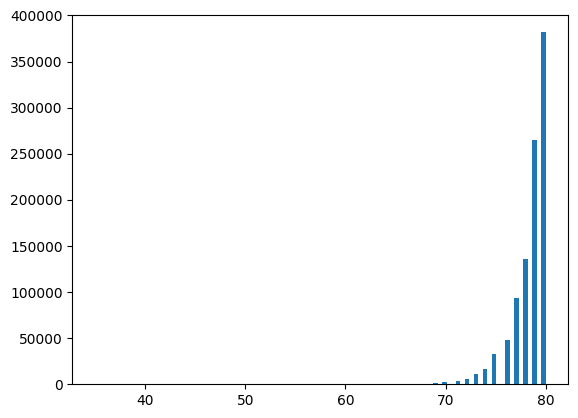

In [11]:
# check the distribution of the length of the journies
lens = []
for journey in journeys_dfs:
    lens.append(len(journey))

print("min: ", min(lens))
print("max: ", max(lens))
print("avg: ", sum(lens) / len(lens))

plt.hist(lens, bins=100)
plt.show()

In [47]:
import pickle

# save the journeys
with open(f"../data/{filename}_journeys.pkl", "wb") as f:
    pickle.dump(journeys_dfs, f)